# Scrapping the amazon website product list 

In [1]:
#importing the required packages.
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import urllib.request, urllib.error, urllib.parse
from bs4 import BeautifulSoup as bs
import time
import random

In [103]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
url = 'https://www.amazon.com/s?k=hoodies+for+women&s=exact-aware-popularity-rank&crid=3H9PJXJ26NJKW&qid=1696173054&sprefix=hoodies+for+women%2Caps%2C109&ref=sr_st_exact-aware-popularity-rank&ds=v1%3AJghaKn823pN6uhKil7URhZSLP%2B47Ov3wJRlYQQ2JBcM'
driver.get(url)
html = driver.page_source

In [104]:
#creating a list of all attributes scraped from amazon website
brands = []
products=[]
past_month =[]
price=[]
ratings=[]
review_count=[]

while True:

    time.sleep(5)

    html = driver.page_source

    soup = bs(html, 'html.parser')

    product_elements = soup.find_all('div', {'data-component-type': 's-search-result'})

    for element in product_elements:

        brand =  element.find('span',class_='a-size-base-plus a-color-base')
        brands.append(brand.string)

        if element.find('span',class_='a-size-base a-color-secondary'):
            a = element.find('span',class_='a-size-base a-color-secondary').string
            a = str(a).strip('+ bought in past month')
            past_month.append(a)
        else:
            past_month.append(None)

        product =  element.find('span',class_='a-size-base-plus a-color-base a-text-normal')
        products.append(product.string)

        rating =  element.find('span',class_='a-size-base puis-normal-weight-text')   
        rating = str(rating).strip('<span class="a-size-base puis-normal-weight-text">')
        rating = str(rating).strip('</')
        ratings.append(rating)

        count =  element.find('span',class_='a-size-base s-underline-text')
        count = str(count).strip('<span class="a-size-base s-underline-text">(')
        count = str(count).strip(')</span>')
        review_count.append(count) 

        p =  element.find('span',class_='a-offscreen')
        p = str(p).strip('<span class="a-offscreen">$')
        p = str(p).strip('</span>')
        price.append(p) 

    try:

        next_button = driver.find_element(By.CSS_SELECTOR, 'a.s-pagination-next.s-pagination-button')
        next_button.click() 

    except Exception as e:
        break


In [206]:
df = pd.DataFrame(list(zip(brands,products,past_month,price,ratings,review_count)),columns =['Brand', 'Product', 'Past Month Sales', 'Price', 'Ratings','review_count' ])

In [207]:
df

,Brand,Product,Past Month Sales,Price,Ratings,review_count
0,JUST MY SIZE,"Women's Plus Size Full, Lightweight Zip-up Hoodie",1K,12.00,4.1,16.8K+
1,Hanes,Women's Full Zip Slub Cotton Jersey Hoodie,1K,14.95,4.3,47.7K+
2,Hanes,"Women's Full-Zip Hooded Sweatshirt, EcoSmart W...",1K,15.16,4.4,37.5K+
3,Trendy Queen,Womens Zip Up Hoodies Long Sleeve Sweatshirts ...,1K,32.99,4.4,2K+
4,Trendy Queen,Womens Oversized Sweatshirts Hoodies Half Zip ...,1K,34.99,4.4,5.2K+
...,...,...,...,...,...,...
329,Ezbelle,Women's Full Zip Up Hoodie Fall Jacket Oversiz...,None,30.99,4.3,94
330,SWISSWELL,Hoodies for Women Winter Fleece Sweatshirt - F...,List:,40.99,4.3,3.3K+
331,Ovanviso,Women Sunflower Graphic Hoodies Long Sleeve Pu...,None,24.99,4.4,26
332,CHICZONE,Long Sleeve Pullover Hoodies Sweatshirt for Wo...,None,30.58,4.5,1.3K+


In [208]:
#dropping rows with no 'past month sales'

df = df.dropna(subset=['Past Month Sales'])

In [209]:
# Drop rows where the value in column 'Past Month Sales' matches any value in the list.

values_to_drop = ['List:','Typical price', 'Typical:','Shop products from small business brands sold in Amazon’s store. Discover more about the small businesses partnering with Amazon and Amazon’s commitment to empowering them.']

df = df[~df['Past Month Sales'].isin(values_to_drop)]

In [202]:
df

,Brand,Product,Past Month Sales,Price,Ratings,review_count
0,JUST MY SIZE,"Women's Plus Size Full, Lightweight Zip-up Hoodie",1K,12.00,4.1,16.8K+
1,Hanes,Women's Full Zip Slub Cotton Jersey Hoodie,1K,14.95,4.3,47.7K+
2,Hanes,"Women's Full-Zip Hooded Sweatshirt, EcoSmart W...",1K,15.16,4.4,37.5K+
3,Trendy Queen,Womens Zip Up Hoodies Long Sleeve Sweatshirts ...,1K,32.99,4.4,2K+
4,Trendy Queen,Womens Oversized Sweatshirts Hoodies Half Zip ...,1K,34.99,4.4,5.2K+
...,...,...,...,...,...,...
164,Champion,"Women's, Powerblend, Zip-up Hoodie Sweatshirt ...",50,45.00,4.7,152
207,Ezymall,Womens Casual Hoodies Pullover Tops Drawstring...,100,29.99,4.2,4.1K+
258,AlvaQ,Women Casual Button V Neck Hoodies Oversized P...,100,36.99,4.3,2.8K+
259,Dokotoo,Womens 2023 Hooded Button Collar Drawstring Ho...,200,30.59,4.4,3K+


In [210]:
#coverting the values into float - changing "10K" into "10000"

def custom_convert(value):
    if 'K+' in value:
        return float(value.replace('K+', '')) * 1000
    else:
        return float(value)
            
df['review_count'] = df['review_count'].apply(custom_convert)

In [211]:
def custom_convert_2(value):
    try:
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        else:
            return float(value)
    except ValueError:
        return None
df['Past Month Sales'] = df['Past Month Sales'].apply(custom_convert_2)

In [215]:
df['Ratings'] = df['Ratings'].astype(float)

In [216]:
df = df[df['Price'] != 'N']
df['Price'] = df['Price'].astype(float)

/var/folders/dp/zzcwvfr901b8drvlv20x1w080000gn/T/ipykernel_32670/806133388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


In [219]:
df.dropna(subset=['Past Month Sales'], inplace=True)
df

/var/folders/dp/zzcwvfr901b8drvlv20x1w080000gn/T/ipykernel_32670/2974107014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Past Month Sales'], inplace=True)


,Brand,Product,Past Month Sales,Price,Ratings,review_count
0,JUST MY SIZE,"Women's Plus Size Full, Lightweight Zip-up Hoodie",1000.0,12.00,4.1,16800.0
1,Hanes,Women's Full Zip Slub Cotton Jersey Hoodie,1000.0,14.95,4.3,47700.0
2,Hanes,"Women's Full-Zip Hooded Sweatshirt, EcoSmart W...",1000.0,15.16,4.4,37500.0
3,Trendy Queen,Womens Zip Up Hoodies Long Sleeve Sweatshirts ...,1000.0,32.99,4.4,2000.0
4,Trendy Queen,Womens Oversized Sweatshirts Hoodies Half Zip ...,1000.0,34.99,4.4,5200.0
...,...,...,...,...,...,...
164,Champion,"Women's, Powerblend, Zip-up Hoodie Sweatshirt ...",50.0,45.00,4.7,152.0
207,Ezymall,Womens Casual Hoodies Pullover Tops Drawstring...,100.0,29.99,4.2,4100.0
258,AlvaQ,Women Casual Button V Neck Hoodies Oversized P...,100.0,36.99,4.3,2800.0
259,Dokotoo,Womens 2023 Hooded Button Collar Drawstring Ho...,200.0,30.59,4.4,3000.0


# CREATING A REGRESSION MODEL TO IDENTIFY KEY ATTRIBUTE

In [249]:
import numpy as np

X = df[['Price', 'Ratings', 'review_count']]
y = df['Past Month Sales']

In [222]:
import pandas as pd
import statsmodels.api as sm

In [250]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Past Month Sales   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                              35.19
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                    2.20e-15
Time:                        18:41:54   Log-Likelihood:                         -674.07
No. Observations:                  98   AIC:                                      1354.
Df Residuals:                      95   BIC:                                      1362.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# APPROACH TO IDENTIFY A TREND FROM BEST SELLERS

In [232]:
#creating a word bin from the 
words=[]
for a in products:
    a = a.split()
    words=words+a

In [153]:
products

["Women's Plus Size Full, Lightweight Zip-up Hoodie",
 "Women's Full Zip Slub Cotton Jersey Hoodie",
 "Women's Full-Zip Hooded Sweatshirt, EcoSmart Women's Sweatshirt, Women's Comfortable Hoodie",
 'Womens Zip Up Hoodies Long Sleeve Sweatshirts Fall Outfits Oversized Sweaters Casual Fashion Jackets',
 'Womens Oversized Sweatshirts Hoodies Half Zip Pullover Fall Fashion Outfits 2023 Y2k Clothes',
 'Womens Oversized Hoodies Sweatshirts Fleece Hooded Pullover Tops Sweaters Casual Comfy Fall Fashion Outfits Clothes 2023',
 "Women's Cute Hoodies Teen Girl Fall Jacket Oversized Sweatshirts Casual Drawstring Zip Up Y2K Hoodie with Pocket",
 'Womens Half Zip Pullover Sweatshirts Quarter Zip Oversized Hoodies Sweaters Fall Outfits 2023 Y2K Winter Clothes',
 'Womens Oversized Sweatshirts Hoodies Fleece Crew Neck Pullover Sweaters Casual Comfy Fall Fashion Outfits Clothes 2023',
 "Women's Plus Size Zip-up Fleece Hoodie, EcoSmart Midweight Hooded Sweatshirt",
 'Women Solid Basic Fleece Letter Loos

In [157]:
words

["Women's",
 'Plus',
 'Size',
 'Full,',
 'Lightweight',
 'Zip-up',
 'Hoodie',
 "Women's",
 'Full',
 'Zip',
 'Slub',
 'Cotton',
 'Jersey',
 'Hoodie',
 "Women's",
 'Full-Zip',
 'Hooded',
 'Sweatshirt,',
 'EcoSmart',
 "Women's",
 'Sweatshirt,',
 "Women's",
 'Comfortable',
 'Hoodie',
 'Womens',
 'Zip',
 'Up',
 'Hoodies',
 'Long',
 'Sleeve',
 'Sweatshirts',
 'Fall',
 'Outfits',
 'Oversized',
 'Sweaters',
 'Casual',
 'Fashion',
 'Jackets',
 'Womens',
 'Oversized',
 'Sweatshirts',
 'Hoodies',
 'Half',
 'Zip',
 'Pullover',
 'Fall',
 'Fashion',
 'Outfits',
 '2023',
 'Y2k',
 'Clothes',
 'Womens',
 'Oversized',
 'Hoodies',
 'Sweatshirts',
 'Fleece',
 'Hooded',
 'Pullover',
 'Tops',
 'Sweaters',
 'Casual',
 'Comfy',
 'Fall',
 'Fashion',
 'Outfits',
 'Clothes',
 '2023',
 "Women's",
 'Cute',
 'Hoodies',
 'Teen',
 'Girl',
 'Fall',
 'Jacket',
 'Oversized',
 'Sweatshirts',
 'Casual',
 'Drawstring',
 'Zip',
 'Up',
 'Y2K',
 'Hoodie',
 'with',
 'Pocket',
 'Womens',
 'Half',
 'Zip',
 'Pullover',
 'Sweatshi

In [159]:
from collections import Counter

word_counts = Counter(words)

sorted_word_count = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

for word, count in sorted_word_count.items():
    print(f"{word}: {count}")

Hoodie: 200
Hoodies: 163
Long: 163
Women's: 156
Sleeve: 154
Sweatshirt: 149
Pullover: 148
Casual: 118
Zip: 104
Women: 104
Sweatshirts: 99
Hooded: 88
Tops: 88
Fleece: 87
with: 76
Womens: 75
Up: 73
for: 70
Drawstring: 57
Oversized: 55
Pocket: 55
Pockets: 48
Fall: 46
Jacket: 46
Loose: 41
Top: 35
Lightweight: 33
Full: 32
Fashion: 32
Cropped: 32
Crop: 29
Clothes: 27
Winter: 27
2023: 25
Color: 24
Print: 22
Lined: 20
Sweater: 20
Block: 20
Y2K: 19
Neck: 19
Plus: 18
Cute: 18
Tunic: 18
Graphic: 18
Zipper: 17
Sherpa: 17
-: 17
Y2k: 16
Solid: 16
With: 16
Shirt: 16
Cotton: 15
Hoodie,: 15
Teen: 13
Basic: 13
Shirts: 13
V: 13
Fit: 13
Sweaters: 12
Trendy: 12
Coat: 12
Size: 11
Outfits: 11
Jackets: 11
Half: 11
Women’s: 11
Streetwear: 11
Workout: 11
Vintage: 11
Button: 10
Girls: 10
Fuzzy: 10
Tie: 10
Thin: 9
Athletic: 9
Dye: 9
Logo: 8
and: 8
Punk: 8
Full-Zip: 7
Quarter: 7
Collar: 7
Thumb: 7
Hole: 7
Knit: 7
(Available: 7
Thick: 7
Short: 7
Essentials: 7
Zip-up: 6
Sweatshirt,: 6
Kangaroo: 6
French: 6
Terry: 6


In [242]:
sorted_word_count.pop('Hoodies')
sorted_word_count.pop('Women\'s')

156

In [235]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

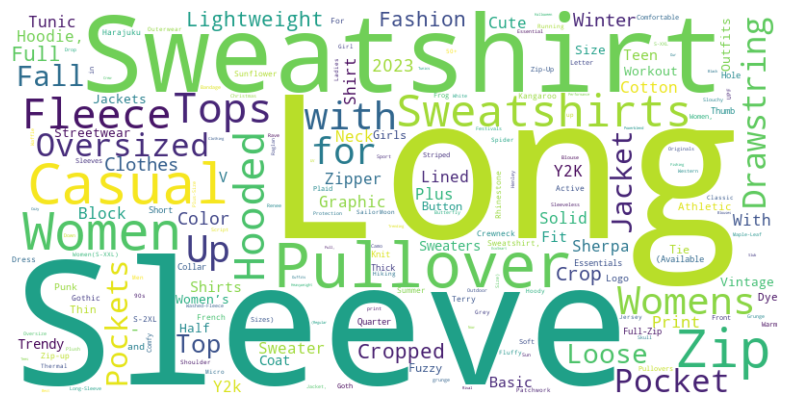

In [243]:
#created a wordcloud for all the words extracted
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(sorted_word_count)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()